In [2]:
import os
import pandas as pd
import numpy as np
import re 


RESULT_PATH = "../results"
TABLES_PATH = os.path.join(RESULT_PATH,'tables')
        

file_ = open("../results/Wine_with_noise_results_varying_segments.txt")
data_string = file_.read()
lines = data_string.split("\n")

In [4]:
for line in lines:
    if line.startswith(" "):
        print("

In [13]:
data = []
for line in lines:
    if line!="":
        data.append(line.split(","))

In [22]:
col_names=["seed","dataset","method","rand_index","time",'segments',"observations"]
method_names = ['Change in Mean', 'change KNN', 'KCP-linear', 'KCP-rbf','MultiRank','Change Forest']
n_segments_list = [20, 80]

In [56]:
df  = pd.read_csv("../results/dirichlet_results_varying_segments (2).txt",names=col_names)

In [67]:
np.unique(df['observations'])

array([ 250,  353,  500,  707, 1000, 1414, 2000, 2828, 4000, 5656, 8000],
      dtype=int64)

In [70]:
new_df= df[df['seed']!=19]

In [94]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [92]:
def get_segment_data(df,method_names,segment):
    rand_index =[]
    time_ = []
    n_observations = np.unique(df['observations'])
    for method_name in method_names:
        temp1 = []
        temp2 = []
        for observation in n_observations:
            ind = (df['method']==method_name)&(df['segments']==segment) & (df['observations']==observation)
            temp1.append(df[ind]['rand_index'].mean())
            temp2.append(df[ind]['time'].mean())
        rand_index.append(temp1)
        time_.append(temp2)
    return rand_index,time_, n_observations
def get_data(df,method_names,segment_list=[20,80]):
    rand_scores = []
    runtimes = []
    for segment in segment_list:
        score,time_,observation = get_segment_data(df,method_names,segment)
        rand_scores.append(score)
        runtimes.append(time_)
    return rand_scores,runtimes,observation
        

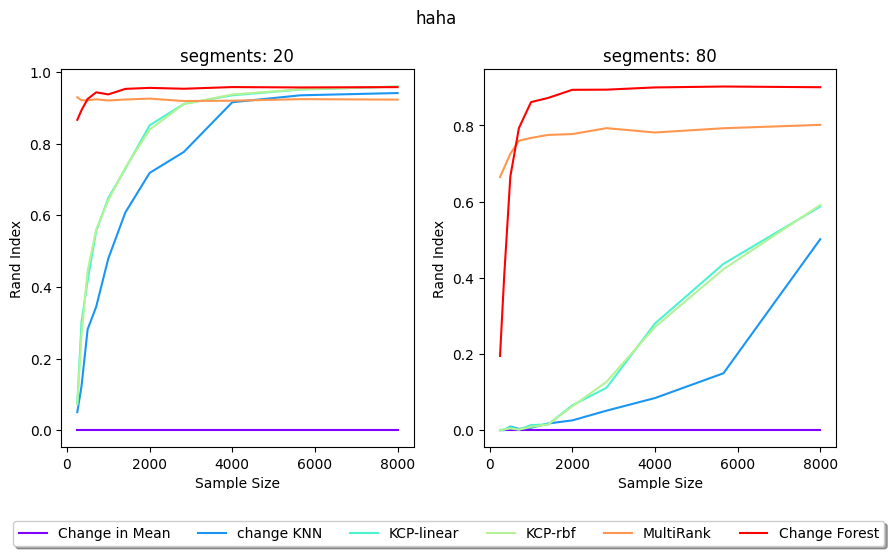

In [89]:
def plot_varying_samplesize_results():
        fig, ax = plt.subplots(2, 2, figsize=(10, 6), gridspec_kw={'height_ratios': [9, 1]})
ax[1][1].set_position([ax[1][0].get_position().x0, ax[1][0].get_position().y0,
                    ax[1][1].get_position().x1 - ax[1][0].get_position().x0,
                    ax[1][0].get_position().height])
X = np.unique(df['observations'])
ax[1][0].remove()
fig.suptitle("haha")
colors = cm.rainbow(np.linspace(0, 1, len(method_names)))
for i,(segment,rand_indices) in enumerate(zip(n_segments_list,rand_indes)):
    for j,(method_rand_ind, method_name) in enumerate(zip(rand_indices,method_names)):
        ax[0][i].plot(X,method_rand_ind,label=method_name,color=colors[j])
        ax[0][i].set_title("segments: "+str(segment))
        ax[0][i].set_xlabel("Sample Size")
        ax[0][i].set_ylabel("Rand Index")
for i, method_name in enumerate(method_names):
        ax[1][1].plot([], [], label=method_name, color=colors[i])

ax[1][1].legend(loc='center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=len(method_names))

ax[1][1].xaxis.set_visible(False)
ax[1][1].yaxis.set_visible(False)

ax[1][1].spines['top'].set_visible(False)
ax[1][1].spines['right'].set_visible(False)
ax[1][1].spines['bottom'].set_visible(False)
ax[1][1].spines['left'].set_visible(False)


plt.show()
        



In [65]:
ind = (temp['method']=="Change in Mean")&(temp['segments']==20) & (temp['observations']==250)

In [66]:
temp[ind]['rand_index'].mean()
temp[ind]['time'].mean()


,seed,dataset,method,rand_index,time,segments,observations
0,1,Dirichlet,Change in Mean,0.0,0.001468,20,250
132,2,Dirichlet,Change in Mean,0.0,0.000121,20,250
264,3,Dirichlet,Change in Mean,0.0,0.000137,20,250
396,4,Dirichlet,Change in Mean,0.0,0.000157,20,250
528,5,Dirichlet,Change in Mean,0.0,0.000118,20,250
660,6,Dirichlet,Change in Mean,0.0,0.000117,20,250
792,7,Dirichlet,Change in Mean,0.0,0.000093,20,250
924,8,Dirichlet,Change in Mean,0.0,0.000125,20,250
1056,9,Dirichlet,Change in Mean,0.0,0.000128,20,250
1188,10,Dirichlet,Change in Mean,0.0,0.000116,20,250


In [167]:
orginal_cpts = []
predicted_cpts = []
dataset_names = []
method_names = []
for line in new_lines:
    if line=="":
        break
    else:
        temp = line.split(",[")
        cpts = temp[-2:]
        temp = temp[0].split(",")[1:3]
        dataset_names.append(temp[0])
        method_names.append(temp[1])
        orginal_cpts.append(list(map(float,re.findall(r'\d+(?:\.\d+)?',cpts[0]))))
        predicted_cpts.append(list(map(float,re.findall(r'\d+(?:\.\d+)?',cpts[1])[1:-1])))

In [168]:
method_names = np.array(method_names)
dataset_names = np.array(dataset_names)

In [169]:
def get_cpts(cpts,ind):
    return [i for i,j in zip(cpts,ind) if j]

In [170]:
ind  = (method_names=="Change in Mean") & (dataset_names=="CIM")

In [171]:
o_cpts = get_cpts(orginal_cpts,ind)[0]

In [172]:
o_cpts

[0.0, 200.0, 400.0, 600.0]

In [183]:
p_cpts = get_cpts(predicted_cpts,ind)
p_cpts = [item for sublist in p_cpts for item in sublist]

In [185]:
len(p_cpts)

200

In [174]:
import matplotlib.pyplot as plt

In [200]:
X_MARKER_KWARGS = {"marker": "x", "color": "green", "linewidth": 10, "s": 2}

array(['CIC', 'CIM', 'CIV', 'Dirichlet'], dtype='<U9')

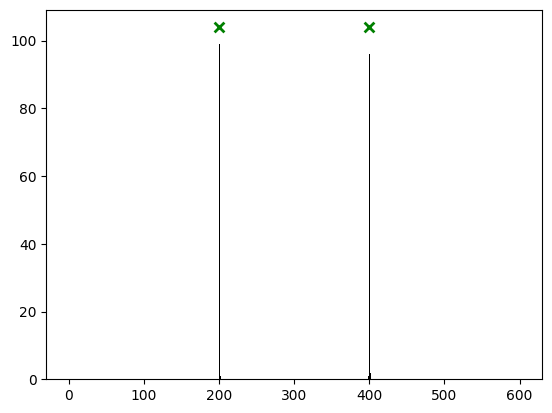

In [202]:
fig, axes = plt.subplots(ncols=3, nrows=2)
axs = axes.flat
for ax, method_name in zip(axs,np.unique(method_names)):
    ax.hist(p_cpts,range=(0, o_cpts[-1]),color='black',bins=int(o_cpts[-1]))
    _, ymax = axes.get_ylim()
    ax.scatter(o_cpts[1:-1], [ymax] * (len(o_cpts) - 2), **X_MARKER_KWARGS)
    ax.set_title(method_name)
plt.show()
